In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy
import torch.optim as optim
import torchvision
import torchvision.transforms as tf
import matplotlib.pyplot as plot
import time
from IPython.display import Image

In [2]:
epochs = 0

### Using a CNN (Convolutional Neural Network) to classify handwritten digits

Two things differ from a "classic" neural network

1. Convolutions  



We use convolutions to take a moving average across
the photo, which is useful for a number of things...

Firstly, we give the network data points that sum
(or average) an area of a photo, which can be useful if
our intention is to get a general idea of a picture, rather
than trying to understand every single pixel. (For example
if we want to ask a network whether there is a cat in a
photo, all it has to understand is the shape of the cat,
not every pixel that can make up a cat.

Secondly, we can do a number of things with a convolution
that will reduce the amount of data our network needs to
take in. If we are using high definition photos (or just
pictures that are of intermediate size, like 225x225)
a network would need to take in 50625 individual data 
points, and have 50625 weights for each node in the following
layer. If we use a large convolution with a large stride,
we can reduce this significantly, making our network much faster,
allowing it to be deeper (and as a result, more accurate).

For these reasons (and a few more) convolutions are
incredibly useful. 

Vocabulary:
"Stride" - how far a jump a convolution takes
(in the photo below, stride is 1)


A visual example of a convolution

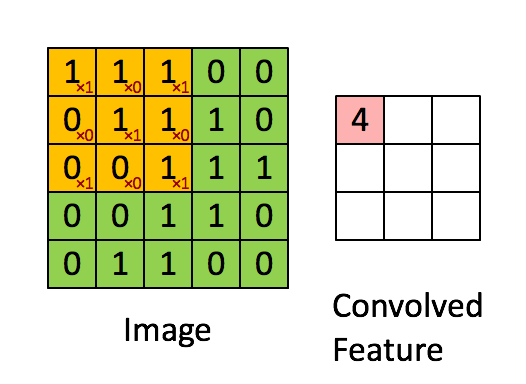

In [3]:
Image('http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif',None,None,None,600,600)

2. Pooling           

Since we are looking at greyscaled images, the use of 
pooling is very helpful. Pooling summarizes information 
from a partition of data points across a dataset
(it doesn't take a moving average, like convolutions do). 
In our case, we are using max pooling across
a 2x2 set of pixels. What this does is it finds the highest value 
in each 2x2 set across the whole image, and replaces
each set with the max. This is especially useful for our purposes
since the network can better capture the shape of the digits by 
seeing a stark contrast between black and white.

Using pooling will also reduce the input data by the area of the pool,
in this case, by 4 times (which can be very useful for reducing the amount
of input points for larger pictures).

There are other types of pooling as well, such as average pooling,
and L2-norm pooling (taking the eucledian norm of each partition).

A visual example of max pooling

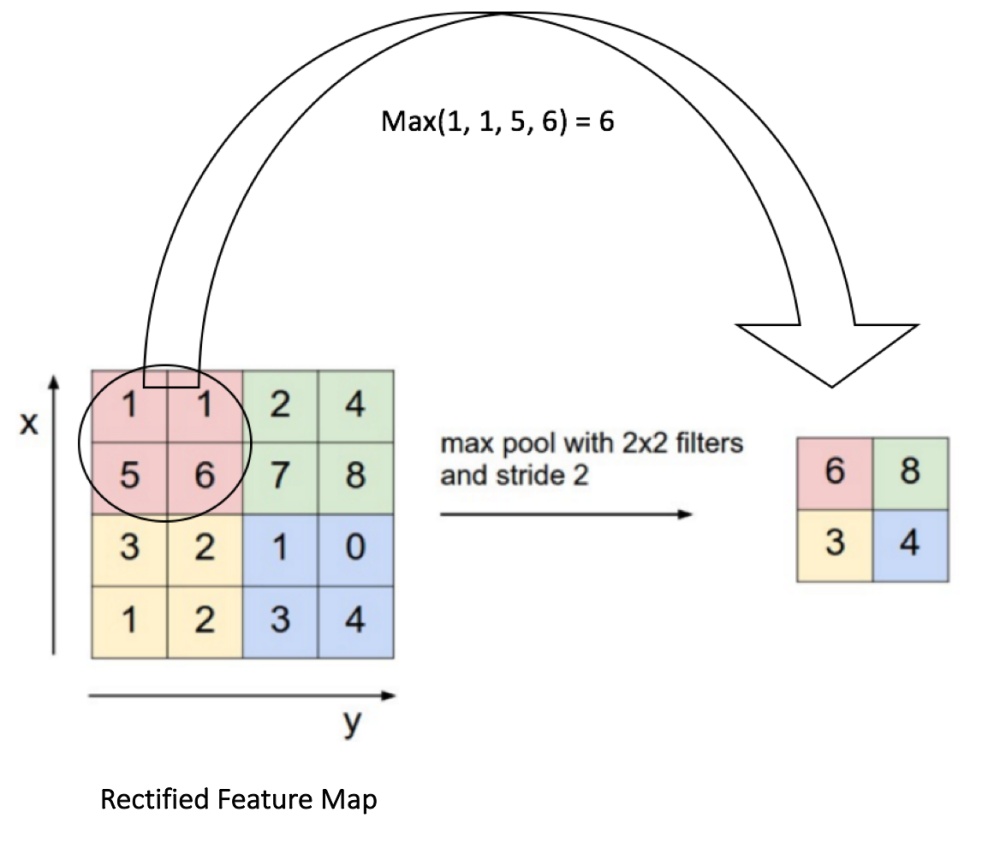

In [4]:
Image("https://blog.algorithmia.com/wp-content/uploads/2018/03/word-image-5.png",None,None,None,600,600)
#credit

In [5]:
class CNN(nn.Module):

    def __init__(self):
        super().__init__()
        # Initializing the neural net
        
        self.conv1 = nn.Conv2d(1, 1, 3, 1)
        # Convolution function description:
        #
        # First number is input images, in this case, 
        # there is 1, in the case of RGB, there would be 3.
        #
        # Second number is the number of output channels,
        # I.E. how many layers this returns from the convolved
        # data.
        # 
        # Third number is the size of the square convolutions,
        # in this case 3x3.
        # 
        # Fourth number is the stride.
        #
        #
        ###self.conv2 = nn.Conv2d(1, 3, 1, 1)
        
        self.fc1 = nn.Linear(169, 80)
        self.fc2 = nn.Linear(80, 30)
        self.fc3 = nn.Linear(30, 10)
        # Defining the layers
        # 169 -> 80 -> 30 -> 10
        
    def forward(self, x):
        # This function defines how the network feeds forward
        
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # Max pooling over a 2x2 window of the function
        # you can leave one number, M to indicate an MxM square
        
        ###x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        
        x = x.view(-1, self.num_flat_features(x))
        # Flattens out the matrix into nodes for the neural net
        
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # This pushes data through the net
        
        return x

    def num_flat_features(self, x):
        # Helper function for flattening a matrix
        size = x.size()[1:]  # the dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Network2 = CNN()


In [6]:
print(Network2)

CNN(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=169, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
)


In [7]:
#Training on mnist

In [8]:
pi = tf.Compose([tf.ToTensor(),tf.Normalize((.3,.3,.3),(.3,.3,.3))])

In [9]:
#Test set
beta = torchvision.datasets.MNIST(root='./data', train = True, download = True, transform = pi)
peta = torch.utils.data.DataLoader(beta, batch_size = 4, shuffle = True, num_workers = 2)

In [10]:
#Training set
ceta = torchvision.datasets.MNIST(root='./data', train = False, download = True, transform = pi)
qeta = torch.utils.data.DataLoader(ceta, batch_size = 4, shuffle = True, num_workers = 2)

In [11]:
dataiter = iter(peta)
zeta,aeta = dataiter.next()

In [12]:
def show(i):
    image = i.numpy()
    plot.imshow(numpy.transpose(image,(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


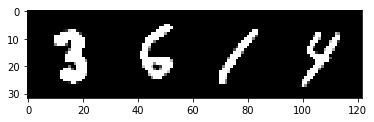

In [13]:
show(torchvision.utils.make_grid(zeta))

In [14]:
#Assigning loss functions and optimization functions (backpropagation)
gamma = nn.CrossEntropyLoss()
sigma = optim.SGD(Network2.parameters(),lr=0.001, momentum = 0.9)

In [24]:
# Training the net
T = time.time()
for iota in range(1):
    running_loss = 0.0
    for i, data in enumerate(peta, 0):
        # Inputs
        inputs, labels = data

        # Set parameter gradients to 0
        sigma.zero_grad()

        # Feed forward, backpropagate, optimize
        outputs = Network2(inputs)
        loss = gamma(outputs, labels)
        loss.backward()
        sigma.step()

        # Print loss every 1000 iterations
        running_loss += loss.item()
        
        if i < 1001:
            if i % 100 == 99:    
                print('[%d, %5d] loss: %.3f' %
                      (iota + 1, i + 1, running_loss/100))
                running_loss = 0.0
        else:   
            if i % 1000 == 999:    
                print('[%d, %5d] loss: %.3f' %
                      (iota + 1, i + 1, running_loss/1000))
                running_loss = 0.0
    epochs += 1
print("Time: ", round(time.time()-T), "Seconds")
print("Epochs ecompleted:", epochs)
print('Finished Training')


[1,   100] loss: 0.203
[1,   200] loss: 0.163
[1,   300] loss: 0.180
[1,   400] loss: 0.137
[1,   500] loss: 0.159
[1,   600] loss: 0.201
[1,   700] loss: 0.255
[1,   800] loss: 0.161
[1,   900] loss: 0.224
[1,  1000] loss: 0.202
[1,  2000] loss: 0.174
[1,  3000] loss: 0.161
[1,  4000] loss: 0.173
[1,  5000] loss: 0.168
[1,  6000] loss: 0.188
[1,  7000] loss: 0.168
[1,  8000] loss: 0.159
[1,  9000] loss: 0.162
[1, 10000] loss: 0.168
[1, 11000] loss: 0.168
[1, 12000] loss: 0.163
[1, 13000] loss: 0.149
[1, 14000] loss: 0.173
[1, 15000] loss: 0.158
Time:  17 Seconds
Epochs ecompleted: 4
Finished Training


In [25]:
# Find the accuracy of the network over a test set
upsilon = 0
epsilon = 0
with torch.no_grad():
    for yupta in qeta:
        yeta, ueta = yupta
        op = Network2(yeta)
        _, predicted = torch.max(op, 1)
        upsilon += ueta.size(0)
        epsilon += (predicted == ueta).sum()

In [26]:
print("Accuracy of the CNN: {}%".format((int(epsilon)/upsilon *100)))
if epochs == 1:
    print("After {} epoch".format(epochs))
else:
    print("After {} epochs".format(epochs))

Accuracy of the CNN: 95.3%
After 4 epochs
